In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

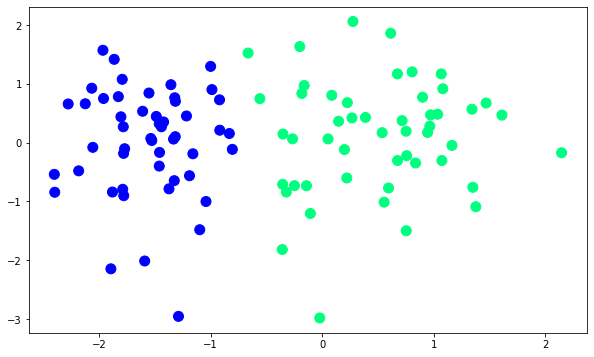

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)


In [7]:
print(coef_)
print(intercept_)

[1.36015898 0.04603201]
0.9


In [8]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

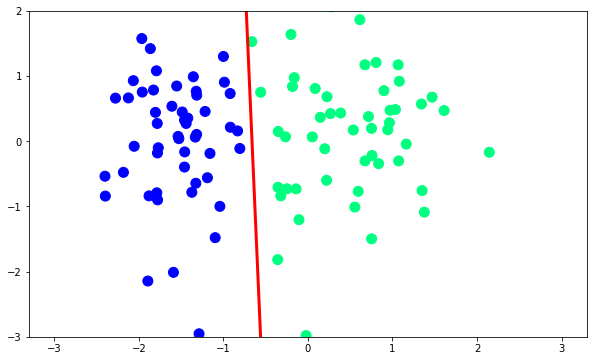

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [2]:
!pip3 install pydot

In [3]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)  # ReLU Activation Function

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Numerical stability
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Define the Multi-Layer Perceptron (MLP) class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initializing Weights and Biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for Input -> Hidden
        self.b1 = np.zeros((1, hidden_size))  # Bias for Hidden Layer
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for Hidden -> Output
        self.b2 = np.zeros((1, output_size))  # Bias for Output Layer

    def forward(self, X):
        """ Forward pass through the network """
        self.Z1 = np.dot(X, self.W1) + self.b1  # Linear Transformation for Hidden Layer
        self.A1 = relu(self.Z1)  # Activation function ReLU
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # Linear Transformation for Output Layer
        self.A2 = softmax(self.Z2)  # Activation function Softmax

        return self.A2

# Example Usage
np.random.seed(42)  # For reproducibility
X_sample = np.random.rand(5, 3)  # 5 samples, 3 features (Input layer)

mlp = MLP(input_size=3, hidden_size=4, output_size=2)  # MLP with 3-4-2 architecture
output = mlp.forward(X_sample)

print("Output Probabilities:\n", output)


Output Probabilities:
 [[0.50000459 0.49999541]
 [0.50001266 0.49998734]
 [0.5000136  0.4999864 ]
 [0.50002866 0.49997134]
 [0.50001719 0.49998281]]


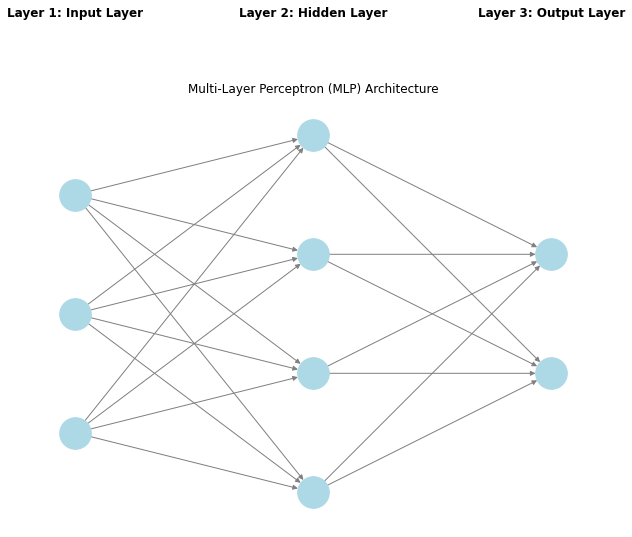

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_mlp(layer_sizes):
    G = nx.DiGraph()
    
    # Define node positions
    pos = {}
    x_offset = 0
    
    for layer_idx, num_nodes in enumerate(layer_sizes):
        y_offset = (num_nodes - 1) / 2  # Center nodes
        for i in range(num_nodes):
            pos[(layer_idx, i)] = (x_offset, y_offset - i)
        x_offset += 2  # Space between layers
    
    # Add edges (connections between layers)
    for layer_idx in range(len(layer_sizes) - 1):
        for i in range(layer_sizes[layer_idx]):
            for j in range(layer_sizes[layer_idx + 1]):
                G.add_edge((layer_idx, i), (layer_idx + 1, j))
    
    # Draw network
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=False, node_size=1000, node_color="lightblue", edge_color="gray")
    
    # Label layers
    for layer_idx, num_nodes in enumerate(layer_sizes):
        x, _ = pos[(layer_idx, 0)]
        layer_name = "Input Layer" if layer_idx == 0 else "Hidden Layer" if layer_idx == len(layer_sizes) - 2 else "Output Layer"
        layer_name = f"Layer {layer_idx + 1}: {layer_name}"
        plt.text(x, max(pos.values(), key=lambda p: p[1])[1] + 1, layer_name, ha="center", fontsize=12, fontweight="bold")
    
    plt.title("Multi-Layer Perceptron (MLP) Architecture")
    plt.show()

# Define the MLP structure [Input Layer, Hidden Layer, Output Layer]
layer_sizes = [3, 4, 2]  # 3 input neurons, 4 hidden neurons, 2 output neurons
draw_mlp(layer_sizes)
